In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [3]:
maximum_csv_read_cound = 5

In [4]:
folder_root = '/home/sogangori/Downloads/dataset/PHM/'
folder_train = folder_root + 'set/CMP-data/training/'
folder_test = folder_root + 'set/CMP-data/test/'
path_train_gt = folder_root + 'set//CMP-training-removalrate.csv'
path_test_gt = folder_root + 'PHM16TestValidationAnswers/orig_CMP-test-removalrate.csv'

In [5]:
paths_train = glob.glob(folder_train+'*.csv')
paths_test = glob.glob(folder_test+'*.csv')
paths_train.sort()
paths_test.sort()
paths_train[0],paths_test[0],len(paths_train),len(paths_test)

('/home/sogangori/Downloads/dataset/PHM/set/CMP-data/training/CMP-training-000.csv',
 '/home/sogangori/Downloads/dataset/PHM/set/CMP-data/test/CMP-test-000.csv',
 185,
 185)

## 학습데이터와 테스트 데이터 읽기 

In [6]:
df_gt = pd.read_csv(path_train_gt)
df_gt.shape

(1981, 3)

In [7]:
df_gt_test = pd.read_csv(path_test_gt)
df_gt_test.shape

(424, 3)

In [8]:
def read_cvs_files(folder, maximum_read_cound):
    df_list = []    
    for i in range(np.minimum(maximum_read_cound,len(folder))):
        df = pd.read_csv(folder[i])
        df_list.append(df)
    print(len(df_list), df.shape)
    df = pd.concat(df_list, 0)
    return df    

In [9]:
df_train = read_cvs_files(paths_train, maximum_csv_read_cound)
df = df_train
df_train.shape, len(df_train)

5 (8120, 25)


((35620, 25), 35620)

In [10]:
df_test = read_cvs_files(paths_test, maximum_csv_read_cound)
df_test.shape

5 (1077, 25)


(6376, 25)

In [11]:
train_m = (df_train.WAFER_ID.astype(np.str) + df_train.STAGE).nunique()
test_m = (df_test.WAFER_ID.astype(np.str) + df_test.STAGE).nunique()
train_m,test_m

(102, 16)

### check type

In [12]:
df_gt.dtypes

WAFER_ID              int64
STAGE                object
AVG_REMOVAL_RATE    float64
dtype: object

In [13]:
df_gt_test.dtypes

WAFER_ID              int64
STAGE                object
AVG_REMOVAL_RATE    float64
dtype: object

In [14]:
df_gt_test.isnull().sum().sum(), df_gt_test.isna().sum().sum()

(0, 0)

In [15]:
df_gt_test.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160678,B,66.9813
1,-4224160592,A,56.1786
2,-887170152,B,64.3881
3,373446766,A,153.2610
4,-4224160686,A,57.2523


### concat train/test set

In [221]:
df_X = pd.concat((df_train, df_test))
df_Y = pd.concat((df_gt, df_gt_test))
df_X.shape, df_Y.shape

((41996, 25), (2405, 3))

In [222]:
df_Y.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905


In [223]:
df_Y.dtypes

WAFER_ID              int64
STAGE                object
AVG_REMOVAL_RATE    float64
dtype: object

In [224]:
df_Y.isna().mean()

WAFER_ID            0.0
STAGE               0.0
AVG_REMOVAL_RATE    0.0
dtype: float64

In [225]:
df_Y.isnull().mean()

WAFER_ID            0.0
STAGE               0.0
AVG_REMOVAL_RATE    0.0
dtype: float64

## 전처리 convert category to int

In [226]:
pd.get_dummies(df_Y).head()

,WAFER_ID,AVG_REMOVAL_RATE,STAGE_A,STAGE_B
0,-4224160600,61.65480,1,0
1,-4224160584,75.86415,0,1
2,-4224160580,71.90700,0,1
3,-4113511818,65.02230,1,0
4,-4113511814,58.27905,1,0


In [227]:
df_Y_dumm = pd.get_dummies(df_Y).drop(columns='STAGE_A')

In [228]:
df_Y_dumm = df_Y_dumm.rename(columns={'STAGE_B':'STAGE'})

In [229]:
df_Y_dumm = df_Y_dumm
df_Y_dumm.head()

,WAFER_ID,AVG_REMOVAL_RATE,STAGE
0,-4224160600,61.65480,0
1,-4224160584,75.86415,1
2,-4224160580,71.90700,1
3,-4113511818,65.02230,0
4,-4113511814,58.27905,0


In [230]:
train_unique_WAFER_m = df_train.WAFER_ID.nunique()
df_train.WAFER_ID.nunique(),df_test.WAFER_ID.nunique()

(74, 16)

In [231]:
df_X.head()

,MACHINE_ID,MACHINE_DATA,TIMESTAMP,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
0,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,565.6,34.651163,0.0,156.8,1.0,60.909091
1,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
2,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.909091
3,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,568.4,34.651163,0.0,156.8,1.0,60.606061
4,2,1,4.816371e+08,371447024,A,1.0,9302.5,534.074074,292.592593,2666.25,...,110.306324,2790.75,2.222222,0.909091,571.2,34.651163,0.0,156.8,1.0,60.909091


In [232]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41996 entries, 0 to 1076
Data columns (total 25 columns):
MACHINE_ID                      41996 non-null int64
MACHINE_DATA                    41996 non-null int64
TIMESTAMP                       41996 non-null float64
WAFER_ID                        41996 non-null int64
STAGE                           41996 non-null object
CHAMBER                         41996 non-null float64
USAGE_OF_BACKING_FILM           41996 non-null float64
USAGE_OF_DRESSER                41996 non-null float64
USAGE_OF_POLISHING_TABLE        41996 non-null float64
USAGE_OF_DRESSER_TABLE          41996 non-null float64
PRESSURIZED_CHAMBER_PRESSURE    41996 non-null float64
MAIN_OUTER_AIR_BAG_PRESSURE     41996 non-null float64
CENTER_AIR_BAG_PRESSURE         41996 non-null float64
RETAINER_RING_PRESSURE          41996 non-null float64
RIPPLE_AIR_BAG_PRESSURE         41996 non-null float64
USAGE_OF_MEMBRANE               41996 non-null float64
USAGE_OF_PRESSURIZE

In [233]:
df_X.MACHINE_ID.nunique(),df_X.MACHINE_ID.unique()

(1, array([2]))

In [275]:
df_X = df_X.drop(columns='MACHINE_ID')

In [276]:
df_X.MACHINE_DATA.nunique(),df_X.MACHINE_DATA.unique()

(6, array([1, 2, 3, 4, 5, 6], dtype=object))

In [277]:
df_X.MACHINE_DATA = df_X.MACHINE_DATA.astype(object)

In [278]:
df_X_dumm = pd.get_dummies(df_X).drop(columns='STAGE_A')
df_X_dumm['STAGE'] = df_X_dumm.STAGE_B

In [279]:
df_X_dumm.head()

,TIMESTAMP,WAFER_ID,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,...,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,MACHINE_DATA_1,MACHINE_DATA_2,MACHINE_DATA_3,MACHINE_DATA_4,MACHINE_DATA_5,MACHINE_DATA_6,STAGE_B,STAGE
0,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,346.8,101.875,...,1.0,60.909091,1,0,0,0,0,0,0,0
1,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,348.0,101.875,...,1.0,60.909091,1,0,0,0,0,0,0,0
2,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,346.8,101.875,...,1.0,60.909091,1,0,0,0,0,0,0,0
3,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,66.666667,348.0,101.875,...,1.0,60.606061,1,0,0,0,0,0,0,0
4,4.816371e+08,371447024,1.0,9302.5,534.074074,292.592593,2666.25,67.142857,348.0,101.875,...,1.0,60.909091,1,0,0,0,0,0,0,0


In [280]:
len(df_X_dumm.groupby(['WAFER_ID','STAGE']))

118

In [281]:
wafer_group = df_X_dumm.groupby(['WAFER_ID','STAGE'])

In [282]:
group_list = [wafer_group.get_group(x) for x in wafer_group.groups]

In [283]:
WAFER_ID_list = [x for x in wafer_group.groups]
len(WAFER_ID_list)

118

In [284]:
len(group_list)

118

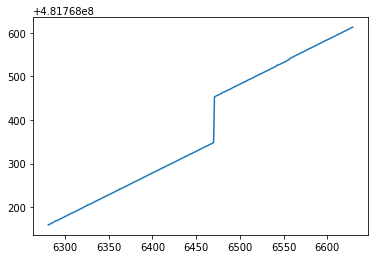

In [285]:
group_list[0].TIMESTAMP.plot()

In [286]:
len_list = []
for group in group_list:
    len_list.append(len(group))

In [287]:
np.min(len_list), np.mean(len_list), np.max(len_list)

(266, 355.89830508474574, 1321)

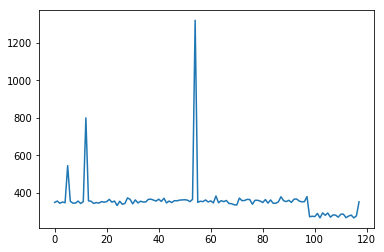

In [288]:
plt.plot(len_list)

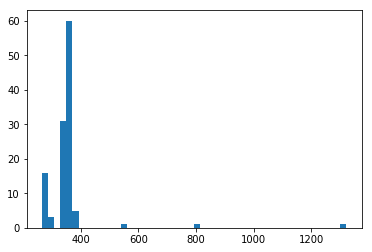

In [289]:
fig = plt.hist(len_list, bins=50)

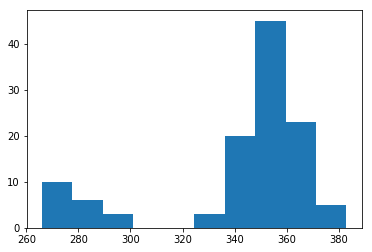

In [290]:
len_arr = np.array(len_list)
fig = plt.hist(len_arr[len_arr<400])

In [291]:
df_gt.sort_values(by=['WAFER_ID','STAGE']).head(2)

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
116,-4230160598,A,68.8818
135,-4230160594,B,70.0533


In [292]:
AVG_REMOVAL_RATE_list = []
for id, stage in WAFER_ID_list:
    cond1 = df_Y_dumm.WAFER_ID==id
    cond2 = df_Y_dumm.STAGE==stage
    cond = np.logical_and(cond1,cond2)
    AVG_REMOVAL_RATE_list.append(df_Y_dumm[cond].AVG_REMOVAL_RATE.values)
len(AVG_REMOVAL_RATE_list)

118

In [293]:
df_gt.head()

,WAFER_ID,STAGE,AVG_REMOVAL_RATE
0,-4224160600,A,61.65480
1,-4224160584,B,75.86415
2,-4224160580,B,71.90700
3,-4113511818,A,65.02230
4,-4113511814,A,58.27905


In [294]:
wafer_group.mean().head()

TIMESTAMP   CHAMBER  USAGE_OF_BACKING_FILM  \
WAFER_ID    STAGE                                                  
-4228160690 0      4.817684e+08  4.664756             516.246418   
-4228160604 0      4.817506e+08  4.654494             349.665262   
-4228160600 0      4.817329e+08  4.674419              87.267442   
            1      4.817575e+08  4.649573             412.590218   
-4228160596 0      4.817327e+08  4.651297              81.998079   

                   USAGE_OF_DRESSER  USAGE_OF_POLISHING_TABLE  \
WAFER_ID    STAGE                                               
-4228160690 0            614.253422                212.444020   
-4228160604 0            605.357886                 64.234290   
-4228160600 0            592.592593                160.495263   
            1            609.054553                120.263797   
-4228160596 0            592.392998                155.788238   

                   USAGE_OF_DRESSER_TABLE  PRESSURIZED_CHAMBER_PRESSURE  \
WAFER_ID    STAGE                                                         
-4228160690 0                 2720.371777                     65.622868   
-4228160604 0                 2714.367978                     40.136437   
-4228160600 0                 2705.864826                     43.759690   
            1                 2716.861823                     67.639398   
-4228160596 0                 2705.616715                     66.559627   

                   MAIN_OUTER_AIR_BAG_PRESSURE  CENTER_AIR_BAG_PRESSURE  \
WAFER_ID    STAGE                                                         
-4228160690 0                       207.844126                55.326827   
-4228160604 0                       121.051685                32.317416   
-4228160600 0                       129.013953                34.123365   
            1                       210.447863                53.943198   
-4228160596 0                       205.687608                54.801873   

                   RETAINER_RING_PRESSURE   ...     HEAD_ROTATION  \
WAFER_ID    STAGE                           ...                     
-4228160690 0                 1423.824069   ...        160.036676   
-4228160604 0                 1180.100562   ...        159.991011   
-4228160600 0                 1110.921802   ...        159.609302   
            1                 1465.388889   ...        160.319088   
-4228160596 0                 1675.291643   ...        160.387320   

                   DRESSING_WATER_STATUS  EDGE_AIR_BAG_PRESSURE  \
WAFER_ID    STAGE                                                 
-4228160690 0                   0.120344              39.439958   
-4228160604 0                   0.553371              22.293156   
-4228160600 0                   0.122093              24.096195   
            1                   0.561254              38.296642   
-4228160596 0                   0.596542              39.142433   

                   MACHINE_DATA_1  MACHINE_DATA_2  MACHINE_DATA_3  \
WAFER_ID    STAGE                                                   
-4228160690 0                 0.0             0.0             0.0   
-4228160604 0                 0.0             0.0             0.0   
-4228160600 0                 0.0             0.0             0.0   
            1                 0.0             0.0             0.0   
-4228160596 0                 0.0             0.0             0.0   

                   MACHINE_DATA_4  MACHINE_DATA_5  MACHINE_DATA_6  STAGE_B  
WAFER_ID    STAGE                                                           
-4228160690 0            0.544413        0.246418        0.209169      0.0  
-4228160604 0            0.553371        0.238764        0.207865      0.0  
-4228160600 0            0.540698        0.244186        0.215116      0.0  
            1            0.552707        0.245014        0.202279      1.0  
-4228160596 0            0.553314        0.242075        0.204611      0.0  

[5 rows x 28 columns]

##  데이터 준비끝. 데이터 numpy 배열로 변환

In [295]:
group_list[0].head()

,TIMESTAMP,WAFER_ID,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,...,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE,MACHINE_DATA_1,MACHINE_DATA_2,MACHINE_DATA_3,MACHINE_DATA_4,MACHINE_DATA_5,MACHINE_DATA_6,STAGE_B,STAGE
6281,4.817682e+08,-4228160690,4.0,510.833333,614.074074,207.407407,2720.25,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,0
6282,4.817682e+08,-4228160690,4.0,510.833333,614.074074,207.407407,2720.25,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,0
6283,4.817682e+08,-4228160690,4.0,510.833333,614.074074,207.407407,2720.25,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,0
6284,4.817682e+08,-4228160690,4.0,510.833333,614.074074,207.407407,2720.25,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,0
6285,4.817682e+08,-4228160690,4.0,510.833333,614.074074,207.407407,2720.25,0.0,0.0,0.0,...,1.0,0.0,0,0,0,1,0,0,0,0


In [296]:
np.array(group_list[0]).shape, np.array(group_list[1]).shape

((349, 30), (356, 30))

In [297]:
m = len(group_list)
max_sequence = 300
feature_k = df_X_dumm.shape[1] - 2
m, max_sequence, feature_k

(118, 300, 28)

In [298]:
X = np.zeros((m, max_sequence, feature_k), np.float32)
sequences = np.zeros(m, np.int32)
for i in range(len(group_list)):
    group = group_list[i]
    group_only_x = group.drop(columns=['WAFER_ID','TIMESTAMP'])
    arr = np.array(group_only_x)
    seq, feature_k = arr.shape
    group_seq = min(seq, max_sequence)
    sequences[i] = group_seq
    X[i, :group_seq] = arr[:group_seq]

In [370]:
Y = np.array(AVG_REMOVAL_RATE_list)
X_2d = np.reshape(X, [-1, feature_k])
X.shape, Y.shape, np.mean(Y)

((118, 300, 28), (118, 1), 77.78124279661017)

In [346]:
Y = (Y - np.min(Y)) / (np.max(Y)- np.min(Y))

In [371]:
np.min(X), np.max(X),np.min(Y), np.max(Y)

(0.0, 10654.8, 53.64735, 153.261)

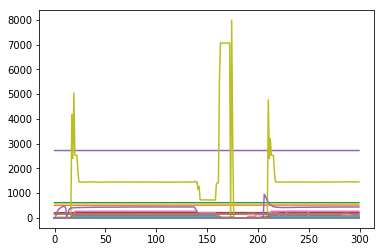

In [372]:
fig=plt.plot(X[0,:])

In [373]:
from sklearn.preprocessing import MinMaxScaler
x_shape= X.shape
scaler_x = MinMaxScaler().fit(X_2d)
scaler_y = MinMaxScaler().fit(Y)

In [374]:
XN = scaler_x.transform(X_2d )
XN = np.reshape(XN, x_shape)
YN = scaler_y.transform(Y)

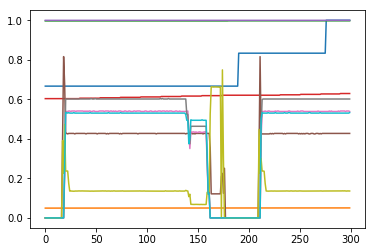

In [351]:
fig=plt.plot(XN[0,:, :10])

In [375]:
valid_m = int(len(Y) * 0.5)
X_train = XN[:-valid_m]
Y_train = YN[:-valid_m]
X_valid = XN[-valid_m:]
Y_valid = YN[-valid_m:]
S_train = sequences[:-valid_m]
S_valid = sequences[-valid_m:]
X_train.shape, X_valid.shape, S_train.shape

((59, 300, 28), (59, 300, 28), (59,))

## 간단 RNN 모델로 학습시켜 본다

In [384]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
tf.reset_default_graph()

In [385]:
def predict(net, s):
    num_unit = 10
    cell = tf.nn.rnn_cell.LSTMCell(num_unit)
    cell2 = tf.nn.rnn_cell.LSTMCell(num_unit)
    outputs, state = tf.nn.dynamic_rnn(cell, net,  dtype=tf.float32,scope='r1')    
    m = tf.shape(net)[0]
    index_m = tf.range(m)
    last_index = tf.stack((index_m, s-1), -1)
    out = tf.gather_nd(outputs, (last_index))
    print('out', out)
    out = slim.fully_connected(out, 1)    
    return out

def predict(net, s):
    net = slim.conv1d(net, 32, 9, stride=3)    
    net = slim.conv1d(net, 32, 9, stride=3)
    net = slim.conv1d(net, 32, 9, stride=3)
    net = slim.conv1d(net, 32, 9, stride=3)
    net = slim.conv1d(net, 1, 4, padding='VALID')
    print('net', net)
    return net[:,0,0]

In [386]:
XX = tf.placeholder(tf.float32, [None, X_train.shape[1], X_train.shape[2]])
YY = tf.placeholder(tf.float32, [None, 1])
SS = tf.placeholder(tf.int32, [None])
p = predict(XX, SS)
p

out Tensor("GatherNd:0", shape=(?, 10), dtype=float32)


<tf.Tensor 'fully_connected/BiasAdd:0' shape=(?, 1) dtype=float32>

In [387]:
#cost = tf.reduce_mean(tf.square(YY - p))
cost =tf.losses.mean_squared_error(YY,p)
train_op = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [388]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [389]:
for iter in range(10):
    _, _cost = sess.run([train_op, cost], feed_dict={XX:X_train, YY:Y_train, SS:S_train})
    if iter%2==0:
        print('%d: cost:%.5f' %(iter,_cost))

0: cost:0.03581
2: cost:0.01820
4: cost:0.01381
6: cost:0.01094
8: cost:0.00897


In [390]:
predict_train = sess.run(p, feed_dict={XX:X_train, YY:Y_train, SS:S_train})
predict_valid = sess.run(p, feed_dict={XX:X_valid, YY:Y_valid, SS:S_valid})

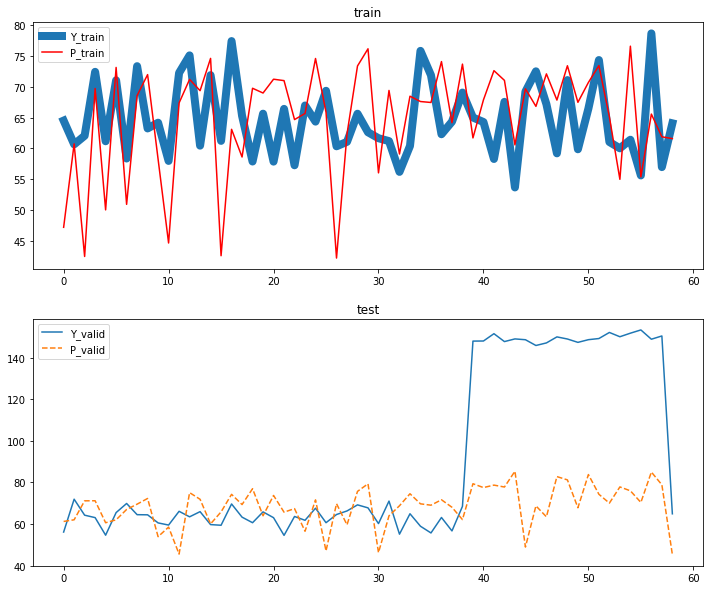

In [393]:
fig, axes = plt.subplots(2,1,figsize=(12,10))
axes[0].plot(scaler_y.inverse_transform(Y_train),linewidth=8)
axes[0].plot(scaler_y.inverse_transform(predict_train),c='r',linestyle='-')
axes[0].set_title('train')
axes[0].legend(['Y_train','P_train'])

axes[1].plot(scaler_y.inverse_transform(Y_valid))
axes[1].plot(scaler_y.inverse_transform(predict_valid),linestyle='--')
axes[1].set_title('test')
axes[1].legend(['Y_valid','P_valid'])